# Programming Assignment 1
* CSCI-4930/5930 ML Spring 2019  (Be sure to discard which section you are not enrolled)
* Author: Ashis Biswas (Replace my name with yours)

## Tasks for everyone (Tasks 1-15)

### TASK 1: Import all the necessary packages here







In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
import math
from numpy.linalg import inv
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### TASK 2: Load the dataset into memory so that you can play with it here

In [2]:
print("TASK 2: Read the dataset...")
dataset = pd.read_csv("baby-weights-dataset2.csv")
print(dataset.shape)
dataset.head()


TASK 2: Read the dataset...
(101400, 37)


,ID,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,...,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE,BWEIGHT
0,2001,2,1,33,26,10,34,12,4,2,...,0,0,0,0,0,0,0,0,0,4.3750
1,2002,2,2,19,40,10,18,11,12,1,...,0,0,0,0,0,0,0,0,0,6.9375
2,2003,2,1,33,16,14,31,16,16,2,...,0,0,0,0,0,0,0,0,0,8.5000
3,2004,1,1,25,40,15,28,12,12,3,...,0,0,0,0,0,0,0,0,0,8.5000
4,2005,1,2,21,60,13,20,12,14,2,...,0,1,0,0,0,0,0,0,0,9.0000


### TASK 3: Compute mean, stdev, min, max, 25% percentile, median and 75% percentile of the dataset (BWEIGHT variable)

In [3]:
print("TASK 3: Compute mean, stdev, min, max, 25% percentile, median and 75% percentile of the dataset (BWEIGHT variable)...")
dataset['BWEIGHT'].describe()






TASK 3: Compute mean, stdev, min, max, 25% percentile, median and 75% percentile of the dataset (BWEIGHT variable)...


count    101400.000000
mean          7.258066
std           1.329461
min           0.187500
25%           6.625000
50%           7.375000
75%           8.062500
max          13.062500
Name: BWEIGHT, dtype: float64

### TASK 4: Also, draw the histogram plot for the BWEIGHT variable


TASK 4: Draw the histogram...


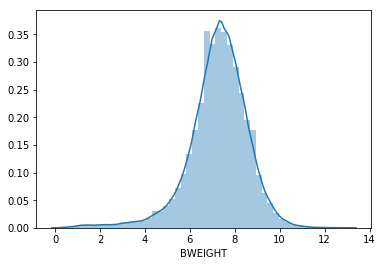

In [4]:
print("TASK 4: Draw the histogram...")
sns.distplot(dataset['BWEIGHT']);






### TASK 5: Present the skewness and kurtosis of the BWEIGHT target variable

In [5]:
print("TASK 5 - Skewness: %f" % dataset['BWEIGHT'].skew())
print("TASK 5 - Kurtosis: %f" % dataset['BWEIGHT'].kurt())





TASK 5 - Skewness: -0.936593
TASK 5 - Kurtosis: 2.868780


### TASK 6: Do variable selection from the pool of 124 variables based on correlation score with the target variable BWEIGHT 
### Please report all the variables you kept for training.

TASK 8: Tackle the dummy category variables
I want to tackle the following variables: 'HISPMOM','HISPDAD','RACEMOM','RACEDAD'. Python will convert them into dummy categorical variables
Index(['ID', 'SEX', 'MARITAL', 'FAGE', 'GAINED', 'VISITS', 'MAGE', 'FEDUC',
       'MEDUC', 'TOTALP', 'BDEAD', 'TERMS', 'LOUTCOME', 'WEEKS', 'CIGNUM',
       'DRINKNUM', 'ANEMIA', 'CARDIAC', 'ACLUNG', 'DIABETES', 'HERPES',
       'HYDRAM', 'HEMOGLOB', 'HYPERCH', 'HYPERPR', 'ECLAMP', 'CERVIX',
       'PINFANT', 'PRETERM', 'RENAL', 'RHSEN', 'UTERINE', 'BWEIGHT',
       'HISPMOM_C', 'HISPMOM_M', 'HISPMOM_N', 'HISPMOM_O', 'HISPMOM_P',
       'HISPMOM_S', 'HISPMOM_U', 'HISPDAD_C', 'HISPDAD_M', 'HISPDAD_N',
       'HISPDAD_O', 'HISPDAD_P', 'HISPDAD_S', 'HISPDAD_U', 'RACEMOM_0',
       'RACEMOM_1', 'RACEMOM_2', 'RACEMOM_3', 'RACEMOM_4', 'RACEMOM_5',
       'RACEMOM_6', 'RACEMOM_7', 'RACEMOM_8', 'RACEDAD_0', 'RACEDAD_1',
       'RACEDAD_2', 'RACEDAD_3', 'RACEDAD_4', 'RACEDAD_5', 'RACEDAD_6',
       'RACEDAD_7', 

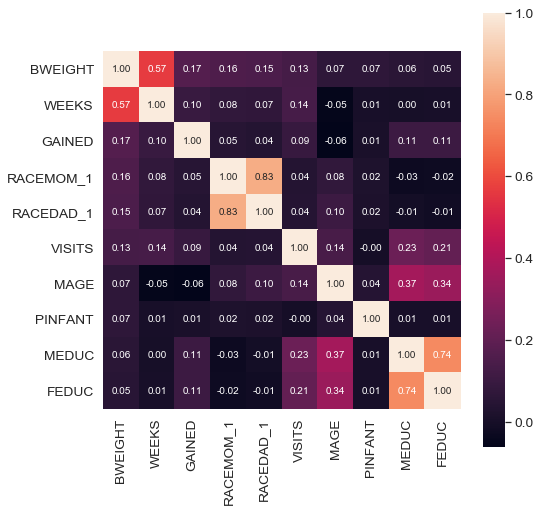

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


As the correlation score, the variables that are kept for training is WEEKS and GAINED, as desccribed in the chart below.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


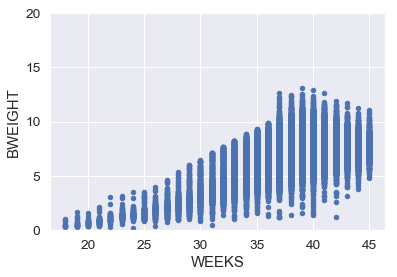

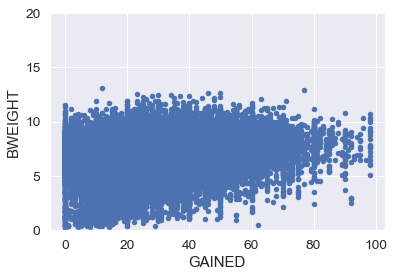

In [7]:
#convert categorical variable into dummy
print("TASK 8: Tackle the dummy category variables")
print("I want to tackle the following variables: 'HISPMOM','HISPDAD','RACEMOM','RACEDAD'. Python will convert them into dummy categorical variables")
dataset_dummy = pd.get_dummies(dataset,columns=['HISPMOM','HISPDAD','RACEMOM','RACEDAD'])
print(dataset_dummy.columns)

print("TASK 6: Select 8 variables from the pool to compute the correlation matrix...")
k = 10 #number of variables for heatmap
correlation_matrix = dataset_dummy.corr()

cols = correlation_matrix.nlargest(k, 'BWEIGHT')['BWEIGHT'].index
cm = np.corrcoef(dataset_dummy[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(8,8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

print("As the correlation score, the variables that are kept for training is WEEKS and GAINED, as desccribed in the chart below.")

var = 'WEEKS'
data = pd.concat([dataset['BWEIGHT'], dataset[var]], axis=1)
data.plot.scatter(x=var, y='BWEIGHT', ylim=(0,20));
var = 'GAINED'
data = pd.concat([dataset['BWEIGHT'], dataset[var]], axis=1)
data.plot.scatter(x=var, y='BWEIGHT', ylim=(0,20));


### TASK 7: Check for missing data, and apply a "good" strategy to tackle it

In [9]:
print("TASK 7: Check for missing data...")
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(37))

print("There is no missing data in baby-weights-dataset2.")


TASK 7: Check for missing data...
          Total  Percent
BWEIGHT       0      0.0
HISPDAD       0      0.0
RACEDAD       0      0.0
RACEMOM       0      0.0
WEEKS         0      0.0
LOUTCOME      0      0.0
TERMS         0      0.0
BDEAD         0      0.0
TOTALP        0      0.0
MEDUC         0      0.0
FEDUC         0      0.0
MAGE          0      0.0
VISITS        0      0.0
GAINED        0      0.0
FAGE          0      0.0
MARITAL       0      0.0
SEX           0      0.0
HISPMOM       0      0.0
CIGNUM        0      0.0
UTERINE       0      0.0
DRINKNUM      0      0.0
RHSEN         0      0.0
RENAL         0      0.0
PRETERM       0      0.0
PINFANT       0      0.0
CERVIX        0      0.0
ECLAMP        0      0.0
HYPERPR       0      0.0
HYPERCH       0      0.0
HEMOGLOB      0      0.0
HYDRAM        0      0.0
HERPES        0      0.0
DIABETES      0      0.0
ACLUNG        0      0.0
CARDIAC       0      0.0
ANEMIA        0      0.0
ID            0      0.0
There is no miss

### TASK 8: Tackle the dummy categorical variables by introducing dummy variables

### TASK 9.1: Randomly split the dataset into training, Tr (80%) and testing, Te (20%)

In [10]:
print("TASK 9.1: Randomly split dataset into training(80%), testing(20%)...")
print("Put WEEKS and GAINED (kept for training) into X matrix, BWEIGHT into Y matrix. We need to compute the weight vector for linear regression function in later steps")
weeks_gained = [[x,z] for x,z in zip(dataset['WEEKS'],dataset['GAINED'])]
weights = [y for y in dataset['BWEIGHT']]
x_train, x_test, y_train, y_test = train_test_split(weeks_gained, weights, test_size=0.2) 
print("Training dataset: x_train['WEEKS','GAINED']; y_train[BWEIGHT]")
print("Testing dataset:  x_test['WEEKS','GAINED'];  y_test[BWEIGHT]")
'''
zipped = zip(x_train, y_train)
for i in zipped:
    print(i)
'''




TASK 9.1: Randomly split dataset into training(80%), testing(20%)...
Put WEEKS and GAINED (kept for training) into X matrix, BWEIGHT into Y matrix. We need to compute the weight vector for linear regression function in later steps
Training dataset: x_train['WEEKS','GAINED']; y_train[BWEIGHT]
Testing dataset:  x_test['WEEKS','GAINED'];  y_test[BWEIGHT]


'\nzipped = zip(x_train, y_train)\nfor i in zipped:\n    print(i)\n'

### TASK 9.2: On the training dataset, apply a normalization technique

In [12]:
#The normalization function is x_new = (x_old - x_min)/(x_max - x_min)
print("TASK 9.2: Apply normalization technique...")
print("***Min-Max normalization - Get the min value of WEEKS, max value of WEEKS, min value of GAINED, max value of GAINED...")
weeks_min = min(dataset['WEEKS'])  
weeks_max = max(dataset['WEEKS'])
gained_min = min(dataset['GAINED'])
gained_max = max(dataset['GAINED'])
print("***Compute the normalized x_train array...")
weeks_gained_temp = []
for i, j in x_train:
    i = (i - weeks_min)/(weeks_max - weeks_min)
    j = (j - gained_min)/(gained_max - gained_min)
    weeks_gained_temp.append([i,j])     
x_train_normalized = weeks_gained_temp
#Add x0 to the X matrix
print("***To prepare for the Gradient Descent Algorithm in the next step, it needs to add x0 vector (x0 = 1) to the X matrix")
for tup in x_train_normalized:
    tup.insert(0,1)
print ("***Normalized x_train array, 5 rows: ")
for tup in x_train_normalized[:5]:
    print(tup)


TASK 9.2: Apply normalization technique...
***Min-Max normalization - Get the min value of WEEKS, max value of WEEKS, min value of GAINED, max value of GAINED...
***Compute the normalized x_train array...
***To prepare for the Gradient Descent Algorithm in the next step, it needs to add x0 vector (x0 = 1) to the X matrix
***Normalized x_train array, 5 rows: 
[1, 0.7777777777777778, 0.2857142857142857]
[1, 0.7407407407407407, 0.19387755102040816]
[1, 0.8148148148148148, 0.21428571428571427]
[1, 0.7777777777777778, 0.35714285714285715]
[1, 0.7777777777777778, 0.23469387755102042]


### TASK 9.3: Apply the training data statistics to normalize the testing data as well.

In [13]:
print("TASK 9.3: Apply normalization for testing data as well...")
weeks_gained_temp = []
for i, j in x_test:
    i = (i - weeks_min)/(weeks_max - weeks_min)
    j = (j - gained_min)/(gained_max - gained_min)
    weeks_gained_temp.append([i,j])     
x_test_normalized = weeks_gained_temp
#Add x0 to the X matrix
print("To prepare for the Gradient Descent Algorithm in the next step, it needs to add x0 vector (x0 = 1) to the X matrix")
for tup in x_test_normalized:
    tup.insert(0,1)
print ("Normalized x_test array, 5 rows: ")
for tup in x_test_normalized[:5]:
    print(tup)




TASK 9.3: Apply normalization for testing data as well...
To prepare for the Gradient Descent Algorithm in the next step, it needs to add x0 vector (x0 = 1) to the X matrix
Normalized x_test array, 5 rows: 
[1, 0.8148148148148148, 0.25510204081632654]
[1, 0.5555555555555556, 0.10204081632653061]
[1, 0.8888888888888888, 0.12244897959183673]
[1, 0.8148148148148148, 0.2857142857142857]
[1, 0.7037037037037037, 0.30612244897959184]


### TASK 10: Find the linear regression function describing the training dataset using a technique you recently learned in class.  CLOSED-FORM vs. Gradient Descent (batch or stochastic or mini-batch).
###          PLEASE DO NOT CALL ANY LIBRARY FUNCTION THAT MIGHT DO THE TASK FOR YOU. If you do, you are most likely get a ZERO for this assignment.

In [14]:
print("TASK 10: Find the linear regression function...")
print("***APPLY CLOSED-FORM...")
#w=(X.transpose * X).inverse*X.transpose*Y
#a = X.transpose * X
a = np.matrix(np.dot(np.matrix(x_train_normalized).T, np.matrix(x_train_normalized)))
#b = a.inversve * X.transpose
b = np.matrix(np.dot(inv(a), np.matrix(x_train_normalized).T))
#w=b*Y
w = np.dot(np.array(b),np.array(y_train))
print("******CLOSED_FORM, Result W(w0,w1,w2) vector: ", w)
#print("******Since X = x_train['WEEKS','GAINED'], meaning always two columns, but thousands of rows, it will not be a square matrix. Therefore x_train can't be inversed. Subsequently CLOSED-FORM doesn't work")
print("***APPLY GRADIENT DESCENT...")
#------------------------------------------------------------
def gradient_descent(y, x, weight_vector, l_rate, iters):
    m = np.array(y).size
    for i in range(iters):
        y_predictions = np.array(np.dot(x, weight_vector))
        weight_vector = weight_vector - l_rate*(1/m)*np.dot(np.array(x).T, y_predictions - np.array(y))
    return weight_vector
#-------------------------------------------------------------
#Declare W vector
W = []
print("******W(w0,w1,w2) vector will be initialized, corresponding to the X matrix (x0(1), x1(WEEKS), x2(GAINED)) above.")
#Initialize the W vector, 3 entries
W = [random.random()*random.randint(1,10) for x in range(3)]
print("******Initialized W(w0,w1,w2) vector to start: ", W)
#Pick the learning rate
learning_rate = 0.5
print("******Pick learning rate: ", learning_rate)
#Pick the iterations
iterations = 100
print("******Pick number of iterations: ", iterations)
#Execute Gradient Descent
print("******Start Gradient Descent algorithm - batch process")
W = gradient_descent(y_train, x_train_normalized, W, learning_rate, iterations)
print("******GRADIENT DESCENT, Result W(w0,w1,w2) vector: ", W)
print("******End Gradient Descent algorithm")






TASK 10: Find the linear regression function...
***APPLY CLOSED-FORM...
******CLOSED_FORM, Result W(w0,w1,w2) vector:  [0.82052032 7.92165205 1.1466357 ]
***APPLY GRADIENT DESCENT...
******W(w0,w1,w2) vector will be initialized, corresponding to the X matrix (x0(1), x1(WEEKS), x2(GAINED)) above.
******Initialized W(w0,w1,w2) vector to start:  [1.6041340991803605, 5.288657070011629, 0.6457279790579423]
******Pick learning rate:  0.5
******Pick number of iterations:  100
******Start Gradient Descent algorithm - batch process
******GRADIENT DESCENT, Result W(w0,w1,w2) vector:  [2.03824854 6.38446846 1.04802406]
******End Gradient Descent algorithm


### Task 11: Predict BWEIGHT target variable for each of the testing dataset using the regression line you learned in Task 10, and report RMSE(testing) (Root Mean Squared Error)

In [15]:
print("TASK 11: Predict BWEIGHT target variable for each of the testing dataset using the regression line you learned in Task 10")
print("***We supposed to use the formula: Yi=W.transpose*Xi.")
print("***However, the W.transpose is (3,1) matrix, X is (m,3) matrix, we can't use the formular. I'll discuss this with you later.")
print("***I am using the loops to compute Y...")
'''
y = []
for i, tup in zip(range(len(x_test_normalized)), x_test_normalized):
    temp = np.dot( np.matrix(tup),np.matrix(weights).T)
    y.append(temp)
print (y[:10])
'''
#Declare y_predicted
y_predicted = []

def predictY(x, weight_vector):
    result = []
    for i in range (len(np.array(x))):
        temp = 0
        for j in range (len(np.array(weight_vector))):
            temp = temp + weight_vector[j]*x[i][j]
        result.append(temp)
    #print("***y_predicted, 5 rows: ", result[:5])
    return(result)
y_predicted = predictY(x_test_normalized, W)
print("***y_predicted, 5 rows: ", y_predicted[:5])
#--------------------------------------------------------------------
RMSE = 0
def root_mean_sqr_err(predicted, real):
    result = 0
    temp = []
    m = np.array(real).size
    for i in range(m):
        dif = math.pow(predicted[i] - real[i],2)
        temp.append(dif)
    result = math.pow(sum(temp)/m,1/2)
    return result
RMSE = root_mean_sqr_err(y_predicted, y_test)
print("***RMSE(testing) - Root Mean Square Error: ", RMSE)
#Store the RMSE in an array
RMSE_array = []
RMSE_array.append(RMSE)




TASK 11: Predict BWEIGHT target variable for each of the testing dataset using the regression line you learned in Task 10
***We supposed to use the formula: Yi=W.transpose*Xi.
***However, the W.transpose is (3,1) matrix, X is (m,3) matrix, we can't use the formular. I'll discuss this with you later.
***I am using the loops to compute Y...
***y_predicted, 5 rows:  [7.507761100742376, 5.692116691314955, 7.841661090105298, 7.539843469998105, 6.851846331961972]
***RMSE(testing) - Root Mean Square Error:  1.0965949937334005


### Repeat TASK 10 additional four times : Run linear regression training again
### After each run, Report RMSE(testing)


In [16]:
print("TASK12: Repeat TASK 10 additional four times") 
print("***Learning rate: ", learning_rate)
print("***No. of iterations: ", iterations)
#print("***Initialize W(w0, w1, w2) vector again, you can skip this step")
#W = [random.random()*random.randint(1,10) for x in range(3)]
for i in range(4): 
    print("******Step ", i)
    W = gradient_descent(y_train, x_train_normalized, W, learning_rate, iterations)
    #print("******GRADIENT DESCENT, Result W(w0,w1,w2) vector: ", W)
    y_predicted = predictY(x_test_normalized, W)
    RMSE = root_mean_sqr_err(y_predicted, y_test)
    print("******RMSE(testing) - Root Mean Square Error: ", RMSE)
    RMSE_array.append(RMSE)


TASK12: Repeat TASK 10 additional four times
***Learning rate:  0.5
***No. of iterations:  100
******Step  0
******RMSE(testing) - Root Mean Square Error:  1.092307725372299
******Step  1
******RMSE(testing) - Root Mean Square Error:  1.0897813970486498
******Step  2
******RMSE(testing) - Root Mean Square Error:  1.0882786216309601
******Step  3
******RMSE(testing) - Root Mean Square Error:  1.0873800265963958


### Task 12: Finally, Report RMSE(testing) = Average(RMSE_test) $\pm$ Stdev(RMSE_test)
### Here Average(RMSE_test) = average of all the 5 RMSE(testing) scores you got above.
### And, stdev(RMSE_test) = standard deviation of all the 5 RMSE(testing) scores above.

In [19]:
print("TASK12: Report RMSE(testing) = Average(RMSE_test) $\pm$ Stdev(RMSE_test)")
print("***5 RMSE collected: ", RMSE_array)
RMSE_stdev = 0
def stdev(list):
    result = 0
    temp = []
    m = np.array(list).size
    list_mean = sum(list)/m
    for i in range(m):   
        dif = math.pow(list[i] - list_mean,2)
        temp.append(dif)
    result = math.pow(sum(temp)/m,1/2)
    return result
RMSE_stdev = stdev(RMSE_array)
print("***STDEV: ", RMSE_stdev)
RMSE_average = sum(RMSE_array)/len(RMSE_array)
print("***Average: ", RMSE_average)
print("***RMSE(testing) = (", RMSE_average , "+/_", RMSE_stdev, ")")
    

TASK12: Report RMSE(testing) = Average(RMSE_test) $\pm$ Stdev(RMSE_test)
***5 RMSE collected:  [1.0965949937334005, 1.092307725372299, 1.0897813970486498, 1.0882786216309601, 1.0873800265963958]
***STDEV:  0.003314296595595338
***Average:  1.090868552876341
***RMSE(testing) = ( 1.090868552876341 +/_ 0.003314296595595338 )


### Task 13: Run linear regression one last time on the whole dataset  (i.e, training+testing which is preprocessed by you above).

In [20]:
print("TASK13: Run linear regression one last time on the whole dataset")
print("***Merge y_train and y_test, x_train_normalized and x_test_normalized")
weights_merged = []
y_train_temp = y_train
for i in range(len(y_test)):
    y_train_temp.append(y_test[i])
weights_merged = y_train_temp

weeks_gained_merged = []
x_train_normalized_temp = x_train_normalized
for i in range(len(x_test_normalized)):
    x_train_normalized_temp.append(x_test_normalized[i])
weeks_gained_merged = x_train_normalized_temp
print("***Run the linear regression on the MERGED dataset")
print("******Initialize W(w0, w1, w2) vector again, you can skip this step")
W = [random.random()*random.randint(1,10) for x in range(3)]
W = gradient_descent(weights_merged, weeks_gained_merged, W, learning_rate, iterations)
print("******GRADIENT DESCENT, Result W(w0,w1,w2) vector: ", W)

TASK13: Run linear regression one last time on the whole dataset
***Merge y_train and y_test, x_train_normalized and x_test_normalized
***Run the linear regression on the MERGED dataset
******Initialize W(w0, w1, w2) vector again, you can skip this step
******GRADIENT DESCENT, Result W(w0,w1,w2) vector:  [2.93743074 4.90332677 1.82753434]


### Task 14: Preprocess the judge-without-label.csv file according টo the strategy you applied above on the whole dataset (task 13)

In [21]:
print("TASK14: Preprocess the judge-without-label.csv file")
print("***Read data in judge-without-label.cvs file")
dataset_judge = pd.read_csv('judge-without-labels.csv')
print("***Dataset Judge shape: ", dataset_judge.shape)

print("***Still keep the independent variables WEEKS and GAINED for examination")
print("***Put WEEKS and GAINED into X matrix. No Y matrix yet. We need to apply linear regression function to compute Y")
weeks_gained_judge = [[x,z] for x,z in zip(dataset_judge['WEEKS'],dataset_judge['GAINED'])]
print("***Apply normalization technique...")
weeks_min_judge = min(dataset_judge['WEEKS'])  
weeks_max_judge = max(dataset_judge['WEEKS'])
gained_min_judge = min(dataset_judge['GAINED'])
gained_max_judge = max(dataset_judge['GAINED'])
print("***Compute the normalized x_normalized_judge array...")
weeks_gained_temp_judge = []
for i, j in weeks_gained_judge:
    i = (i - weeks_min_judge)/(weeks_max_judge - weeks_min_judge)
    j = (j - gained_min_judge)/(gained_max_judge - gained_min_judge)
    weeks_gained_temp_judge.append([i,j])     
x_normalized_judge = weeks_gained_temp_judge
#Add x0 to the X matrix
print("***To prepare for the Gradient Descent prediction in the next step, it needs to add X0 vector (X0 = 1) to the X matrix")
for tup in x_normalized_judge:
    tup.insert(0,1)





TASK14: Preprocess the judge-without-label.csv file
***Read data in judge-without-label.cvs file
***Dataset Judge shape:  (2001, 36)
***Still keep the independent variables WEEKS and GAINED for examination
***Put WEEKS and GAINED into X matrix. No Y matrix yet. We need to apply linear regression function to compute Y
***Apply normalization technique...
***Compute the normalized x_normalized_judge array...
***To prepare for the Gradient Descent prediction in the next step, it needs to add X0 vector (X0 = 1) to the X matrix


### Task 15: Predict BWEIGHT for each of the samples from the judge-without-label.csv file, and save the results in judge-submission-run-1.csv in the format below. Please change the run number and report what changes you have made in a corresponding file run-1.txt.

In [42]:
print("Task 15: Predict BWEIGHT for each of the samples from the judge-without-label.csv file")
y_predicted_judge = []
y_predicted_judge = predictY(x_normalized_judge, W)
print("***Save predicted result to file...")
y_predicted_judge_to_save = np.array(y_predicted_judge)
temp = []
i = 0
for tup in y_predicted_judge_to_save:
    b = [] 
    b.append(i)
    b.append(tup)
    temp.append(b)
    i = i + 1
y_predicted_judge_to_save = temp
print(y_predicted_judge_to_save[:5])
run = 1
np.savetxt(f'judge-submission-run-{run}.csv', y_predicted_judge_to_save, fmt = "%i,%f", delimiter=",", header="ID,BWEIGHT", comments='')









Task 15: Predict BWEIGHT for each of the samples from the judge-without-label.csv file
***Save predicted result to file...
[[0, 7.290111532747385], [1, 7.360160990701753], [2, 7.329623210459365], [3, 7.3301809946183685], [4, 7.316665140425468]]


# Tasks only for CSCI-5930 (Grad) students

### Task 16: Repeat tasks 9-12 three times, and report the ultimate RMSE_test average $\pm$ ultimate RMSE_test stdev

In [43]:
print("TASK 16: Repeat tasks 9-12 three times.")
print("***x_normalized_judge dataset is already normalized, just need to split")
x_train_judge, x_test_judge = train_test_split(x_normalized_judge, test_size=0.2)
y_train_judge, y_test_judge = train_test_split(y_predicted_judge, test_size=0.2)
RMSE_array_judge = []
for i in range(3):
    print("***Step: ", i)
    print("******Compute W(w0,w1,w2) vector base on training dataset")
    W = gradient_descent(y_train_judge, x_train_judge, W, learning_rate, iterations)
    print("******Apply W(w0,w1,w2) vector and test dataset to predict y^")
    y_predicted_test_judge = predictY(x_test_judge, W)
    RMSE_judge = root_mean_sqr_err(y_predicted_test_judge, y_test_judge)
    print("******RMSE(judge testing) - Root Mean Square Error: ", RMSE_judge)
    RMSE_array_judge.append(RMSE_judge)
RMSE_stdev_judge = stdev(RMSE_array_judge)
print("***Ultimate Report***")
print("***STDEV(judge testing): ", RMSE_stdev_judge)
RMSE_average_judge = sum(RMSE_array_judge)/len(RMSE_array_judge)
print("***Average(judge testing): ", RMSE_average_judge)
print("***RMSE(judge testing) = (", RMSE_average , "+/_", RMSE_stdev, ")")


TASK 16: Repeat tasks 9-12 three times.
***x_normalized_judge dataset is already normalized, just need to split
***Step:  0
******Compute W(w0,w1,w2) vector base on training dataset
******Apply W(w0,w1,w2) vector and test dataset to predict y^
******RMSE(judge testing) - Root Mean Square Error:  0.04398861849372978
***Step:  1
******Compute W(w0,w1,w2) vector base on training dataset
******Apply W(w0,w1,w2) vector and test dataset to predict y^
******RMSE(judge testing) - Root Mean Square Error:  0.041431522631496014
***Step:  2
******Compute W(w0,w1,w2) vector base on training dataset
******Apply W(w0,w1,w2) vector and test dataset to predict y^
******RMSE(judge testing) - Root Mean Square Error:  0.04007322238260713
***Ultimate Report***
***STDEV(judge testing):  0.0016232356412007262
***Average(judge testing):  0.04183112116927764
***RMSE(judge testing) = ( 1.090868552876341 +/_ 0.003314296595595338 )


### Task 17: Make an entry in the Kaggle challenge [https://www.kaggle.com/c/csci-ml-s19-pa1/] by joining and submitting the judge-submission-run1.csv file, and please report your Kaggle handle here too.
### There is limit of 5 entries each day untile the deadline.
### For each of the runs you submit, please report here the RMSE you got (as reported by the Kaggle platform).

In [45]:
print("Kaggle score: 1.26773")


    







Kaggle score: 1.26773
